# Statbotics Python API Documentation

Statbotics.io aims to modernize FRC data analytics through developing and distributing advanced metrics such as Elo and OPR. We have created a Python API to easily query these metrics. This document will serve as a guide to using the API. Enjoy!

The Statbotics API is available on PyPI and can be installed using pip. On your local machine, run **"python -m pip install statbotics"**

Having installed the library, we can now use it in our code. The following cell shows the minimal setup required.

Resources:

* Website: https://statbotics.io/

* Documentation: https://statbotics.readthedocs.io/en/latest/

* Github: https://github.com/avgupta456/statbotics

* Chief Delphi: https://www.chiefdelphi.com/t/introducing-statbotics-io-modernizing-frc-data-analytics/385360

In [43]:
import statbotics
import pandas as pd
from matplotlib import pyplot as plt
sb = statbotics.Statbotics()

import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_label, geom_text
from adjustText import adjust_text

The Statbotics API lets you query the following objects:
1. **Teams**: Get a team's location and Elo statistics (Current Elo, Recent Elo, Mean Elo, Max Elo)
2. **Years**: Get the prediction accuracy and Brier score using Elo and OPR to predict matches, and ILS to predict RPs
3. **TeamYears**: Get a team's performance in a specific year (Start Elo, Pre-Champs Elo, End Elo, ... , Component OPRs, ILS)
4. **Events**: Get summary statistics for a given event (Type, Week, Top 8 Elos, Top 24 Elos, Top 8 OPRs, Top 24 OPRs)
5. **TeamEvents**: Get a team's performance in a specific event (Start Elo, Pre-Playoffs Elo, End Elo, ..., Component OPRs, ILS)
6. **Matches**: Get statistics for a specific match (score breakdown, Elo, OPR, ILS predictions)
7. **TeamMatches**: Get information for a specific team in a specific match (Match, Alliance, Elo)

For each of these seven objects, there are functions to return a specific object, or a list of objects by certain criteria. Each object is returned as a dictionary mapping columns to specific values. Let's look at some examples!

## get_team()

The get_team() function returns information on a specific team. Let's see how we can get the Elo statistics for my team, FRC 5511 Cortechs Robotics.

In [44]:
data  = sb.get_team(5511)
print(data)
print()

print("Team ", data["team"], "has a current Elo of", data["elo"])

{'team': 5511, 'name': 'Cortechs Robotics', 'state': 'NC', 'country': 'USA', 'district': 'fnc', 'active': True, 'elo': 1604, 'elo_recent': 1659, 'elo_mean': 1605, 'elo_max': 1700, 'wins': 167, 'losses': 131, 'ties': 6, 'count': 304, 'winrate': 0.5592}

Team  5511 has a current Elo of 1604


It's that simple! We can see the name, state, district, country, active status, and elo statistics. As a quick primer, Elo is a measure of team strength, updated after each match based on predicted and actual winning margin. An Elo of 1500 is average and an Elo of 1800 corresponds roughly to the 99% percentile.

## get_teams()

The get_teams() function returns information on multiple teams, and supports multiple filters. We can pass arguments to filter by country, state, district, and active status. We can also order the output by a metric, and limit the output to a number of entries to speed up the query. Check https://statbotics.readthedocs.io/en/latest/ for all the details! For now, let's see how we can get the top 10 teams by recent elo.

In [66]:
print("Top Texas teams by Recent Elo")
print()



data = sb.get_teams(state='TX',metric='elo',limit=50)
#print(data)
print("Rank\t Team\t Elo\t Win Rate")
for i, entry in enumerate(data):
    print(i+1, "\t", entry["team"], "\t", entry["elo"],"\t", entry['winrate'])



Top Texas teams by Recent Elo

Rank	 Team	 Elo	 Win Rate
1 	 148 	 2025 	 0.7794
2 	 3310 	 1974 	 0.7274
3 	 118 	 1894 	 0.793
4 	 6800 	 1860 	 0.6178
5 	 4206 	 1842 	 0.5249
6 	 624 	 1834 	 0.6681
7 	 3847 	 1823 	 0.6518
8 	 3005 	 1752 	 0.6006
9 	 1477 	 1715 	 0.6966
10 	 231 	 1714 	 0.5787
11 	 2881 	 1709 	 0.5031
12 	 4063 	 1706 	 0.6264
13 	 2687 	 1691 	 0.6827
14 	 8177 	 1687 	 0.8039
15 	 2468 	 1686 	 0.6576
16 	 5572 	 1676 	 0.5981
17 	 2582 	 1676 	 0.5769
18 	 7179 	 1667 	 0.5991
19 	 6672 	 1663 	 0.7235
20 	 2158 	 1653 	 0.5027
21 	 7492 	 1650 	 0.6634
22 	 2848 	 1643 	 0.6357
23 	 4639 	 1635 	 0.4729
24 	 324 	 1632 	 0.6863
25 	 1429 	 1627 	 0.5465
26 	 5417 	 1626 	 0.5062
27 	 3035 	 1625 	 0.5146
28 	 4192 	 1621 	 0.4622
29 	 635 	 1620 	 0.7308
30 	 3679 	 1619 	 0.5423
31 	 5892 	 1615 	 0.5023
32 	 317 	 1615 	 0.76
33 	 6377 	 1611 	 0.5201
34 	 5431 	 1604 	 0.5787
35 	 1255 	 1600 	 0.4849
36 	 1817 	 1600 	 0.5321
37 	 3481 	 1600 	 0.5467


In [68]:
df  = pd.DataFrame(data)
df.head
#ax.scatter(df['elo'],df['winrate'])
#fig, ax = plt.subplots()

#for i, txt in enumerate(n):


KeyError: 'opr_auto'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


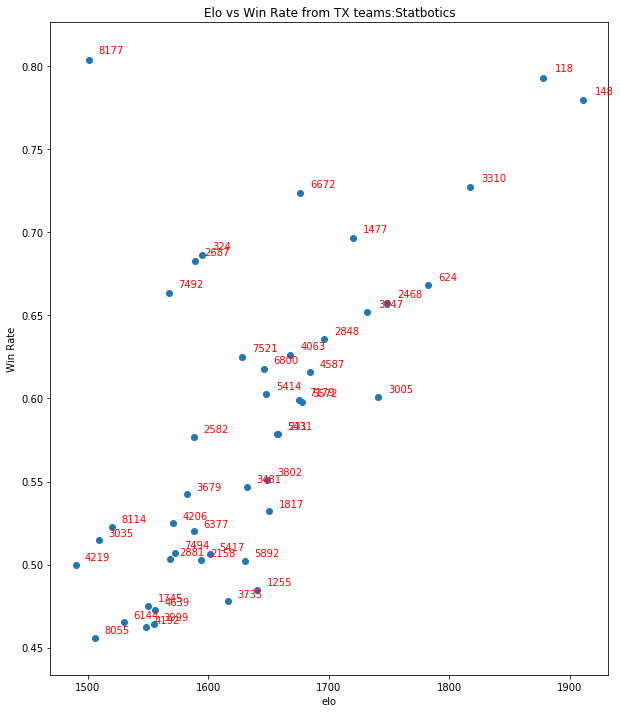

In [55]:
# data

#fig, ax = plt.subplots()
df  = pd.DataFrame(data)
#df.describe
#df['']
#df[['elo_end','winrate']].plot.scatter(x='elo_end',y='winrate')
#df.plot.hist()

fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(x = df['elo_recent'], y = df['winrate'])
plt.xlabel("elo")
plt.ylabel("Win Rate")
plt.title("Elo vs Win Rate from TX teams:Statbotics")
for i in range(df.shape[0]):
 plt.text(x=df['elo_recent'][i]+0.005*df['elo_recent'][i] ,y= df['winrate'][i]+0.005*df['winrate'][i],s= df["team"][i], 
          fontdict=dict(color='red',size=10))

plt.show()
#ax.annotate(df['team'].to_numeric(s, downcast="integer"),(df['elo_end'],df['winrate']) )
#df["teamnum"] = df["team"].astype("string")







posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


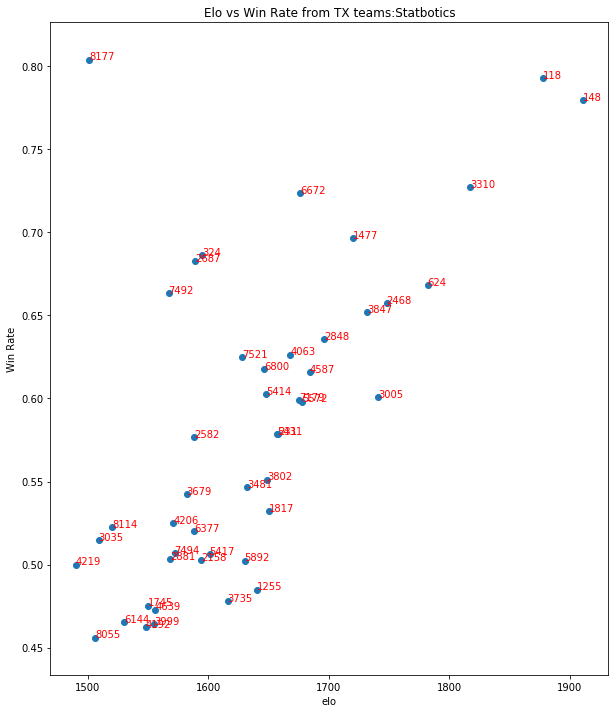

In [58]:


fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(x = df['elo_recent'], y = df['winrate'])
plt.xlabel("elo")
plt.ylabel("Win Rate")
plt.title("Elo vs Win Rate from TX teams:Statbotics")
for i in range(df.shape[0]):
 plt.text(x=df['elo_recent'][i],y= df['winrate'][i],s= df["team"][i], 
          fontdict=dict(color='red',size=10))

plt.show()
#ax.annotate(df['team'].to_numeric(s, downcast="integer"),(df['elo_end'],df['winrate']) )
#df["teamnum"] = df["team"].astype("string")


In [59]:
df.head

<bound method NDFrame.head of     team                          name state country district  active   elo  \
0    148                 Robowranglers    TX     USA      fit    True  2025   
1   3310           Black Hawk Robotics    TX     USA      fit    True  1974   
2    118                     Robonauts    TX     USA      fit    True  1894   
3   6800                         Valor    TX     USA      fit    True  1860   
4   4206                    Robo Vikes    TX     USA      fit    True  1842   
5    624                    CRyptonite    TX     USA      fit    True  1834   
6   3847                Spectrum   -△◅    TX     USA      fit    True  1823   
7   3005                  RoboChargers    TX     USA      fit    True  1752   
8   1477                  Texas Torque    TX     USA      fit    True  1715   
9    231                  High Voltage    TX     USA      fit    True  1714   
10  2881                     Lady Cans    TX     USA      fit    True  1709   
11  4063              

In [71]:
print("Top Texas teams by Recent Elo")
print()

#returns aggrefate math results
data = sb.get_events(state='TX',fields=['all'],year=2022)
df_events = pd.DataFrame(data)
df_events.head

for i, entry in enumerate(df):
    print(i+1, "\t", entry["team"], "\t", entry["elo"],"\t", entry['winrate'],
         "\t", entry["opr_auto"], "\t", entry["opr_endgame"],"\t", entry['opr_1']
         )


Top Texas teams by Recent Elo



TypeError: string indices must be integers

In [72]:
print("Top Texa teams by Recent Elo")
print()

#returns aggrefate math results
data = sb.get_team_events(state='TX',year =2022,fields=['all'])
print(data)
#for i, entry in enumerate(data):
#    print(i+1, "\t", entry["team"], "\t", entry["elo"],"\t", entry['winrate'],
#         "\t", entry["opr_auto"], "\t", entry["opr_endgame"],"\t", entry['opr_1']
#         )


Top Texa teams by Recent Elo

[{'id': None, 'team': 27, 'year': 2022, 'event': '2022cmptx', 'time': 1650412800, 'team_name': 'Team RUSH', 'event_name': 'FIRST Championship (Houston)', 'state': 'TX', 'country': 'USA', 'district': None, 'type': 4, 'week': 8, 'status': 'Upcoming', 'elo_start': 1952, 'elo_pre_playoffs': 1952, 'elo_end': 1952, 'elo_mean': 1952, 'elo_max': 1952, 'elo_diff': 0, 'opr_start': 63.58, 'opr_end': 63.58, 'opr_auto': 15.98, 'opr_teleop': 30.24, 'opr_1': 44.49, 'opr_2': -0.0, 'opr_endgame': 14.82, 'opr_fouls': 1.05, 'opr_no_fouls': 61.05, 'ils_1_start': 1.16, 'ils_2_start': 0.63, 'ils_1_end': 1.16, 'ils_2_end': 0.63, 'wins': 0, 'losses': 0, 'ties': 0, 'count': 0, 'winrate': 0.0, 'rank': -1}, {'id': None, 'team': 59, 'year': 2022, 'event': '2022cmptx', 'time': 1650412800, 'team_name': 'RamTech', 'event_name': 'FIRST Championship (Houston)', 'state': 'TX', 'country': 'USA', 'district': None, 'type': 4, 'week': 8, 'status': 'Upcoming', 'elo_start': 1596, 'elo_pre_playof

In [73]:
print("Top 10 teams by Recent Elo")
print()

data = sb.get_teams(metric="elo_recent", limit=10, fields=["team", "elo_recent"])

print("Rank\t Team\t Elo")
for i, entry in enumerate(data):
    print(i+1, "\t", entry["team"], "\t", entry["elo_recent"])

Top 10 teams by Recent Elo

Rank	 Team	 Elo
1 	 254 	 1982
2 	 2056 	 1955
3 	 1678 	 1920
4 	 148 	 1911
5 	 195 	 1897
6 	 2046 	 1882
7 	 2481 	 1880
8 	 118 	 1878
9 	 2910 	 1867
10 	 225 	 1863


## get_year() and get_years()

These functions return information on year objects. Each dictionary contains the year, accuracy (acc) and mean-squared-error (mse) for match predictions that year (using Elo, OPR, and a mixed approach), and accuracy and mean-squared-error for ranking point predictions (2016-Present) using Caleb Sykes' ILS metric.

In [74]:
print("Years Ranked By Match Prediction Accuracy")
print()

data = sb.get_years(metric="mix_acc", fields=["year", "mix_acc", "mix_mse"])

print("Year\t Accuracy\t MSE")
for entry in data:
    print(entry["year"], "\t", str(entry["mix_acc"]).ljust(6), "\t", entry["mix_mse"])

Years Ranked By Match Prediction Accuracy

Year	 Accuracy	 MSE
2022 	 0.7699 	 0.1531
2018 	 0.7408 	 0.1741
2013 	 0.7368 	 0.1708
2019 	 0.7146 	 0.1773
2014 	 0.7115 	 0.1856
2015 	 0.7112 	 0.1805
2011 	 0.7088 	 0.1697
2016 	 0.7085 	 0.1835
2020 	 0.7055 	 0.1857
2012 	 0.6952 	 0.1838
2009 	 0.6795 	 0.1965
2006 	 0.6683 	 0.2015
2008 	 0.6652 	 0.1939
2017 	 0.6601 	 0.2034
2005 	 0.6566 	 0.2081
2004 	 0.6398 	 0.2044
2010 	 0.624  	 0.1778
2003 	 0.6212 	 0.2235
2007 	 0.6077 	 0.2139
2002 	 0.5389 	 0.243
2021 	 None   	 None


## get_team_year() and get_team_years()

We also can get information for a specific team during a specific year (ex. 254 during 2018). The output dictionary includes the team, year, location information, Elo statistics (Start, Pre-Champs, End, Mean, Max, Diff), and component OPR statistics (using ixOPR with 2 iterations). 

Let's see how we can get the top 25 most dominant seasons of all time (keeping in mind it is easier to dominate in certain years).

Top 25 TX teams by teleop and endgame



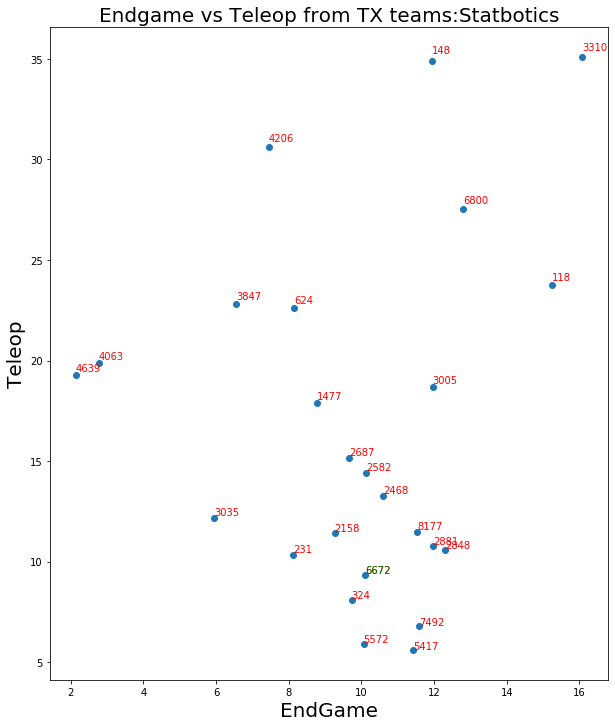

In [75]:
print("Top 25 TX teams by teleop and endgame")
print()

data = sb.get_team_years(metric="elo_max", limit=25,year=2022,state='TX')

df = pd.DataFrame(data)

df.filter(regex='opr').head
#print("Rank\t Team\t Year\t Elo Max")
#for i, entry in enumerate(data):
#    print(i + 1, "\t", entry["team"], "\t", entry["year"], "\t", entry["elo_max"])
#print()


fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(x = df['opr_endgame'], y = df['opr_teleop'])
plt.xlabel("EndGame",size=20)
plt.ylabel("Teleop",size=20)
plt.title("Endgame vs Teleop from TX teams:Statbotics",size=20)
for i in range(df.shape[0]):
 plt.text(x=df['opr_endgame'][i],y= df['opr_teleop'][i]+0.01*df['opr_teleop'][i],s= df["team"][i], 
          fontdict=dict(color='red',size=10))

plt.text(x=df.opr_endgame[df.team==6672],y=df.opr_teleop[df.team==6672]+0.01*df.opr_teleop[df.team==6672],
         s= "6672", fontdict=dict(color='green',size=10)
        )
         
plt.show()
#ax.annotate(df['team'].to_numeric(s, downcast="integer"),(df['elo_end'],df['winrate']) )
#df["teamnum"] = df["team"].astype("string")




Top 25 TX teams by teleop and endgame



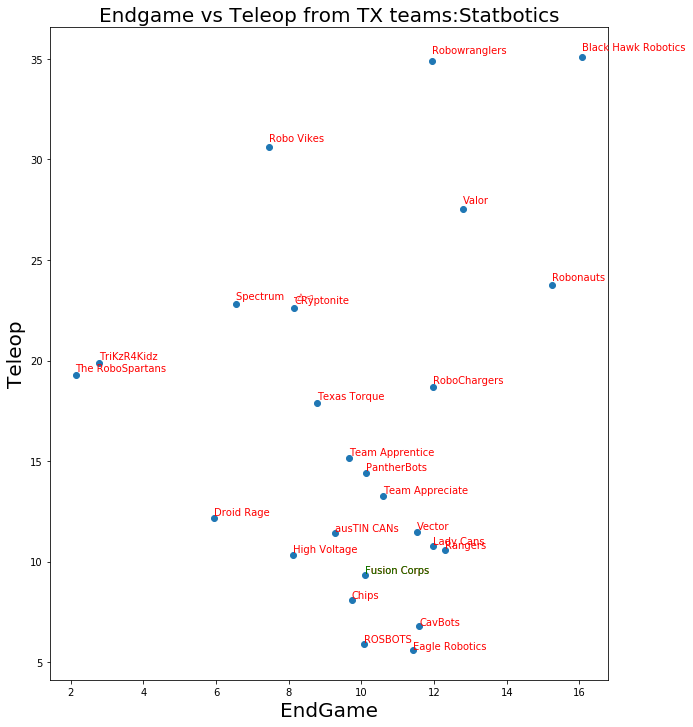

In [76]:
print("Top 25 TX teams by teleop and endgame")
print()

data = sb.get_team_years(metric="elo_max", limit=25,year=2022,state='TX')

df = pd.DataFrame(data)

df.filter(regex='opr').head
#print("Rank\t Team\t Year\t Elo Max")
#for i, entry in enumerate(data):
#    print(i + 1, "\t", entry["team"], "\t", entry["year"], "\t", entry["elo_max"])
#print()


fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(x = df['opr_endgame'], y = df['opr_teleop'])
plt.xlabel("EndGame",size=20)
plt.ylabel("Teleop",size=20)
plt.title("Endgame vs Teleop from TX teams:Statbotics",size=20)
for i in range(df.shape[0]):
 plt.text(x=df['opr_endgame'][i],y= df['opr_teleop'][i]+0.01*df['opr_teleop'][i],s= df["name"][i], 
          fontdict=dict(color='red',size=10))

plt.text(x=df.opr_endgame[df.team==6672],y=df.opr_teleop[df.team==6672]+0.01*df.opr_teleop[df.team==6672],
         s= "Fusion Corps", fontdict=dict(color='green',size=10)
        )
         
plt.show()
#ax.annotate(df['team'].to_numeric(s, downcast="integer"),(df['elo_end'],df['winrate']) )
#df["teamnum"] = df["team"].astype("string")

In [80]:
print("Top 25 by Elo")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
#ils-1 = cargo_RP, ils_2 = Hanger_RP
display(df)

Top 25 by Elo


,id,year,team,name,state,country,district,elo_start,elo_pre_champs,elo_end,elo_mean,elo_max,elo_diff,opr,opr_auto,opr_teleop,opr_1,opr_2,opr_endgame,opr_fouls,opr_no_fouls,ils_1,ils_2,wins,losses,ties,count,winrate,elo_rank,elo_percentile,opr_rank,opr_percentile
0,None,2022,148,Robowranglers,TX,USA,fit,1817,2025,2025,1941,2025,208,68.66,16.62,34.91,49.56,0.0,11.94,1.56,63.46,1.06,0.59,34,2,0,36,0.944,7,0.002,10,0.004
1,None,2022,3310,Black Hawk Robotics,TX,USA,fit,1702,1974,1974,1868,1974,272,67.26,14.47,35.08,47.88,-0.0,16.08,2.36,65.64,1.08,0.79,34,2,0,36,0.944,8,0.003,8,0.003
2,None,2022,118,Robonauts,TX,USA,fit,1758,1890,1890,1855,1894,132,52.07,13.36,23.74,34.88,-0.0,15.25,6.85,52.35,1.01,0.82,48,5,0,53,0.906,31,0.010,36,0.013
3,None,2022,6800,Valor,TX,USA,fit,1594,1848,1848,1744,1860,254,52.46,12.11,27.55,37.83,0.0,12.79,3.16,52.45,0.86,0.55,34,3,0,37,0.919,39,0.013,35,0.012
4,None,2022,4206,Robo Vikes,TX,USA,fit,1510,1827,1827,1702,1842,317,51.25,13.66,30.61,42.49,0.0,7.45,0.56,51.72,1.21,0.40,45,9,0,54,0.833,47,0.015,39,0.014
5,None,2022,624,CRyptonite,TX,USA,fit,1674,1834,1834,1772,1834,160,46.29,13.92,22.63,35.45,0.0,8.15,2.59,44.70,1.03,0.71,28,6,0,34,0.824,52,0.017,77,0.027
6,None,2022,3847,Spectrum -△◅,TX,USA,fit,1694,1808,1808,1774,1823,114,42.15,10.07,22.82,30.66,-0.0,6.55,-0.42,39.45,0.68,0.50,32,4,0,36,0.889,59,0.019,126,0.044
7,None,2022,3005,RoboChargers,TX,USA,fit,1641,1752,1752,1657,1752,111,41.19,10.71,18.70,27.05,-0.0,11.96,0.03,41.37,0.25,0.51,26,8,0,34,0.765,122,0.039,100,0.035
8,None,2022,1477,Texas Torque,TX,USA,fit,1623,1711,1711,1661,1715,88,34.77,8.01,17.89,23.66,-0.0,8.78,1.20,34.68,0.42,0.58,29,7,0,36,0.806,177,0.057,198,0.069
9,None,2022,231,High Voltage,TX,USA,fit,1659,1714,1714,1664,1714,55,34.29,12.85,10.36,21.36,0.0,8.12,-1.13,31.33,0.45,0.35,21,10,1,32,0.672,178,0.057,274,0.096


## get_event() and get_events()

These two functions return information on events. For a given event, we can get the key, name, week, type (regional, district, etc), Elo statistics (Top 8, Top 24, Mean), and OPR statistics (Top 8, Top 24, Mean).

This example gets the average "Top 8 OPR" by event type (regional, district, district champ, worlds division, einstein)

Top 25 TX teams by CargoRP and Hander_RP



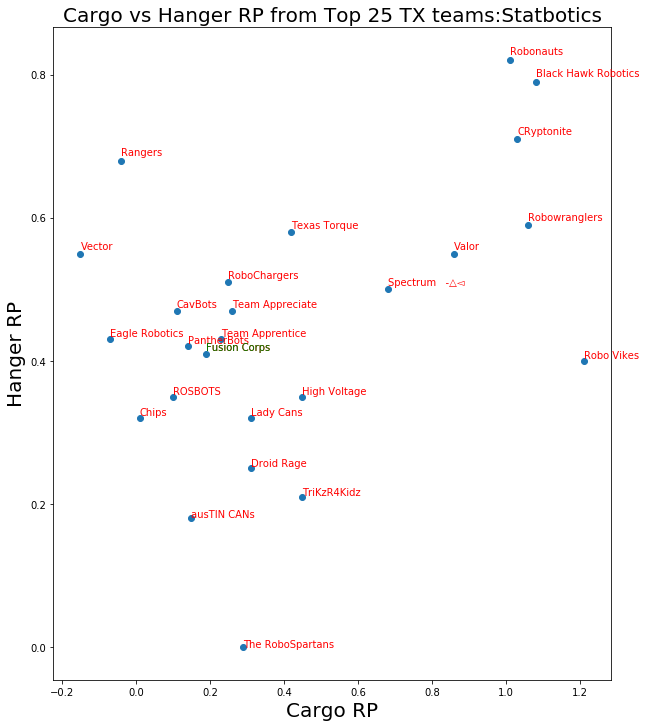

In [81]:
print("Top 25 TX teams by CargoRP and Hander_RP")
print()

data = sb.get_team_years(metric="elo_max", limit=25,year=2022,state='TX')

df = pd.DataFrame(data)

df.filter(regex='opr').head
#print("Rank\t Team\t Year\t Elo Max")
#for i, entry in enumerate(data):
#    print(i + 1, "\t", entry["team"], "\t", entry["year"], "\t", entry["elo_max"])
#print()


fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(x = df['ils_1'], y = df['ils_2'])
plt.xlabel("Cargo RP",size=20)
plt.ylabel("Hanger RP",size=20)
plt.title("Cargo vs Hanger RP from Top 25 TX teams:Statbotics",size=20)
for i in range(df.shape[0]):
 plt.text(x=df['ils_1'][i],y= df['ils_2'][i]+0.01*df['ils_2'][i],s= df["name"][i], 
          fontdict=dict(color='red',size=10))

plt.text(x=df.ils_1[df.team==6672],y=df.ils_2[df.team==6672]+0.01*df.ils_2[df.team==6672],
         s= "Fusion Corps", fontdict=dict(color='green',size=10)
        )
#texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
#adjust_text(texts)



plt.show()
#ax.annotate(df['team'].to_numeric(s, downcast="integer"),(df['elo_end'],df['winrate']) )
#df["teamnum"] = df["team"].astype("string")



## get_team_event() and get_team_events()

Similar to get_team_years(), we can get statistics on how a team fared in a specific event. This information includes the team, event information (week, type, etc), Elo statistics (Start, Pre-Playoffs, End, Mean, Max, Diff), and component OPR statistics.

Let's take a look at 469's start and end Elo per event during the 2010 season, which remains the highest Elo ratings ever recorded in FRC.

In [92]:
print("2022 Events")
print()

data = sb.get_team_events(team=6672, year=2022)

df = pd.DataFrame(data)
display(df)

2022 Events



,id,team,year,event,time,team_name,event_name,state,country,district,type,week,status,elo_start,elo_pre_playoffs,elo_end,elo_mean,elo_max,elo_diff,opr_start,opr_end,opr_auto,opr_teleop,opr_1,opr_2,opr_endgame,opr_fouls,opr_no_fouls,ils_1_start,ils_2_start,ils_1_end,ils_2_end,wins,losses,ties,count,winrate,rank
0,None,6672,2022,2022txfor,1647475200,Fusion Corps,FIT District Fort Worth Event,TX,USA,fit,1,3,Completed,1641,1655,1642,1651,1665,1,20.71,22.02,4.37,8.11,10.91,-0.0,9.54,0.82,22.02,-0.15,0.02,0.07,0.41,12,5,1,18,0.694,4
1,None,6672,2022,2022txirv,1648080000,Fusion Corps,FIT District Irving Event,TX,USA,fit,1,4,Completed,1642,1602,1599,1618,1649,-43,21.56,25.96,6.53,9.33,14.12,-0.0,10.10,1.93,25.96,0.07,0.41,0.19,0.41,12,6,0,18,0.667,9


## get_match() and get_matches()

If you are interested in score breakdowns and individual predictions, these are the functions for you! These methods return a lot of information on the match (elims, set number, match number), scores (component breakdown for both alliances), and predictions (RP predictions and predicted winner by Elo, OPR, mixed method)

We can see how Statbotics.io predicted matches for 2019 Houston Einstein Championships (Spoiler Alert: 78% Accuracy)

In [93]:
print("Match Predictions for 2019 Houston Champs")
print()

matches = sb.get_matches(event="2019cmptx", elims=True, fields=["key", "winner", "mix_winner", "mix_win_prob"])

print("Match Key\t\t Actual\t\t Predicted\tRed Win Prob")
for match in matches:
    print(match["key"].ljust(15), "\t", match["winner"], "\t\t", match["mix_winner"], "\t\t", match["mix_win_prob"])

Match Predictions for 2019 Houston Champs

Match Key		 Actual		 Predicted	Red Win Prob
2019cmptx_sf1m1 	 blue 		 red 		 0.5462
2019cmptx_sf1m2 	 red 		 red 		 0.5982
2019cmptx_sf1m3 	 blue 		 blue 		 0.1322
2019cmptx_sf1m4 	 blue 		 blue 		 0.4454
2019cmptx_sf1m5 	 red 		 blue 		 0.2898
2019cmptx_sf1m6 	 red 		 red 		 0.8126
2019cmptx_sf1m7 	 blue 		 blue 		 0.3154
2019cmptx_sf1m8 	 blue 		 red 		 0.698
2019cmptx_sf1m9 	 red 		 blue 		 0.4346
2019cmptx_sf1m10 	 blue 		 blue 		 0.314
2019cmptx_sf1m11 	 red 		 red 		 0.601
2019cmptx_sf1m12 	 blue 		 red 		 0.5082
2019cmptx_sf1m13 	 blue 		 red 		 0.5758
2019cmptx_sf1m14 	 blue 		 blue 		 0.3038
2019cmptx_sf1m15 	 red 		 red 		 0.6965
2019cmptx_f1m1  	 red 		 blue 		 0.3544
2019cmptx_f1m2  	 blue 		 blue 		 0.3687
2019cmptx_f1m3  	 blue 		 blue 		 0.3502


## get_team_match() and get_team_matches()

Our final two methods, these are mostly here for completion, though I'm sure there are creative uses for these. Each dictionary only returns the team, match, alliance, and Elo prior to the match being played. 

In this example, we see how many matches Team 125 plays per year (they've averaged 100+ since 2014!)

In [89]:
print(sb.token)
print(sb.session)

RFdMF3NHiQUna2v834z89qTFxTktOhykujKx0TcDbCe0BurpLsJMLxSmhmCJCWQh


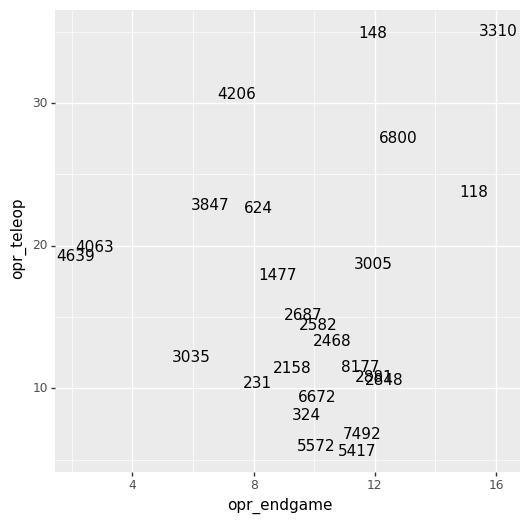

<ggplot: (-9223371887855252284)>

In [99]:
data = sb.get_team_years(metric="elo_max", limit=25,year=2022,state='TX')

df = pd.DataFrame(data)

adjust_text_dict = {'force_text':(10, 10),'expand_points': (0, 0), 'arrowprops': {'arrowstyle': '-'}}

plotnine.options.figure_size = (6,6 )

#geom_label(adjust_text={'expand_points': (1.5, 1.5), 'arrowprops': {'arrowstyle': '-'}}).

(ggplot(df,aes(x='opr_endgame',y='opr_teleop',label='team')) + 
 geom_text() )
 

In [ ]:
adjustText.adjust_text

That's all for this demonstration. I hope you have a better understanding of how the API works, and I look forward to seeing all the cool things everyone does with this!